In [10]:
from shake import *

In [11]:
import numpy as np
rng = np.random.default_rng(seed = 123456)
c1 = Constraints(masses = [16, 1.0, 1.0])
r = gen_coord()
s = shift_coord(*r, rng)
c1.load_s(s)
c1.load_r(r)

print("SHAKE:")
print([g for g in c1.itershake()])

print("ILVES-M:")
print([g for g in c1.iterilvesm()])

print("ILVES-F:")
print([g for g in c1.iterilvesf()])

print("Quartic:")
noniter_gamma = noniter_3p2c_gamma(c1)
print(noniter_gamma)


SHAKE:
[array([0.06606297, 0.00394132]), array([0.06822629, 0.00401169]), array([0.06837041, 0.00401625]), array([0.06838017, 0.00401656])]
ILVES-M:
[array([0., 0.]), array([0.06606297, 0.00394132]), array([0.06837803, 0.00401649]), array([0.06838088, 0.00401658])]
ILVES-F:
[array([0., 0.]), array([0.07062351, 0.00409335]), array([0.06839137, 0.00401595]), array([0.06838092, 0.00401656])]
Quartic:
0.9947512558318723
quartic of X_plus 0.9973721751843052 is 0.021909123993823387
quartic of X_minus -0.9973721751843052 is 0.022316553395242744
Initial guess X0: -0.9967899010761957
Converged X: -0.996488484488282
Quartic value at X: 1.4765966227514582e-14
Root success flag: True
Function evaluations: 19 Jacobian evaluations: 1
[0.06838088 0.00401658]


In [12]:
#Water
from shake import *
import numpy as np

rng = np.random.default_rng(seed=123456)

# masses: O, H, H
c1 = Constraints(masses=[16, 1.0, 1.0])

# water geometry (nm)
r = np.array([
    [0.0, 0.0, 0.0],                      # O
    [0.097, 0.0, 0.0],                    # H1
    [-0.097*np.cos(np.deg2rad(104)),
      0.097*np.sin(np.deg2rad(104)),
      0.0]                                # H2
])

s = shift_coord(*r, rng)

c1.load_s(s)
c1.load_r(r)

#SHAKE 
shake_iters = len(list(c1.itershake()))

#ILVES-M 
ilvesm_iters = len(list(c1.iterilvesm())) - 1

#ILVES-F 
ilvesf_iters = len(list(c1.iterilvesf())) - 1

# Quartic 
gamma_quartic = noniter_3p2c_gamma(c1)

print("\nIterations / cost to converge:")
print(f"SHAKE      : {shake_iters} iterations")
print(f"ILVES-M    : {ilvesm_iters} iterations")
print(f"ILVES-F    : {ilvesf_iters} iterations")
print(f"Quartic    : non-iterative (root solver, evals shown above)")




0.994751255831873
quartic of X_plus 0.9973721751843055 is 0.0004816760097567929
quartic of X_minus -0.9973721751843055 is 0.0004774932755094996
Initial guess X0: -0.9972197418981161
Converged X: 0.9972131779115504
Quartic value at X: 2.220446049250313e-16
Root success flag: True
Function evaluations: 24 Jacobian evaluations: 1

Iterations / cost to converge:
SHAKE      : 9 iterations
ILVES-M    : 7 iterations
ILVES-F    : 8 iterations
Quartic    : non-iterative (root solver, evals shown above)


/workspaces/python-shake/shake/core.py:98: RuntimeWarning: overflow encountered in matmul
  return 0.5*self.Jinv@(gammasum@self.H)@gammadiff
/workspaces/python-shake/shake/core.py:97: RuntimeWarning: invalid value encountered in subtract
  gammasum = 2*gamma-gammadiff
/workspaces/python-shake/shake/core.py:184: RuntimeWarning: overflow encountered in matmul
  new_sigma = np.array([l@l for l in new_s_cons]) - self.conlens*self.conlens
/workspaces/python-shake/shake/core.py:188: RuntimeWarning: invalid value encountered in matmul
  new_gamma = gamma.copy() + 0.5*np.linalg.inv(self.J_ilvesf)@new_sigma


In [13]:
#Methanol
from shake import *
import numpy as np

rng = np.random.default_rng(seed=123456)

# masses: C, O, H
c1 = Constraints(masses=[12.0, 16.0, 1.0])

# methanol C–O–H geometry (nm)
R_CO = 0.142      # nm
R_OH = 0.097      # nm
THETA_COH = 107.1 # degrees

# Place O at origin, C on +x axis, H in x-y plane at angle THETA_COH from the +x axis
r = np.array([
    [0.0, 0.0, 0.0],                           # O
    [R_CO, 0.0, 0.0],                           # C
    [R_OH*np.cos(np.deg2rad(THETA_COH)),
     R_OH*np.sin(np.deg2rad(THETA_COH)),
     0.0]                                       # H
], dtype=float)

s = shift_coord(*r, rng)

c1.load_s(s)
c1.load_r(r)

#SHAKE 
shake_iters = len(list(c1.itershake()))

#ILVES-M 
ilvesm_iters = len(list(c1.iterilvesm())) - 1   # subtract initial [0,0]

#ILVES-F 
ilvesf_iters = len(list(c1.iterilvesf())) - 1   # subtract initial [0,0]

#Quartic
gamma_quartic = noniter_3p2c_gamma(c1)  

print("\nIterations / cost to converge:")
print(f"SHAKE      : {shake_iters} iterations")
print(f"ILVES-M    : {ilvesm_iters} iterations")
print(f"ILVES-F    : {ilvesf_iters} iterations")
print(f"QDS        : 1 (root solver; evals shown above)")


0.994751255831873
quartic of X_plus 0.9973721751843055 is 0.0006577917374738229
quartic of X_minus -0.9973721751843055 is 0.0018405822822961104
Initial guess X0: -0.9969588693878415
Converged X: -0.9969213073142187
Quartic value at X: 3.3306690738754696e-14
Root success flag: True
Function evaluations: 22 Jacobian evaluations: 1

Iterations / cost to converge:
SHAKE      : 9 iterations
ILVES-M    : 7 iterations
ILVES-F    : 9 iterations
QDS        : 1 (root solver; evals shown above)


/workspaces/python-shake/shake/core.py:112: RuntimeWarning: invalid value encountered in matmul
  return (s_coords-self.W@self.L.T@np.diag(gamma)@self.L@r_coords).copy()


In [14]:
#Chloroform Cl-C-Cl
from shake import *
import numpy as np

rng = np.random.default_rng(seed=123456)

# Particle order: 0=C (centre), 1=Cl, 2=Cl
c1 = Constraints(masses=[12.0, 35.45, 35.45])

R_CCl = 0.177      # nm
THETA = 110.6      # degrees (Cl–C–Cl at C)

theta = np.deg2rad(THETA)

r = np.array([
    [0.0, 0.0, 0.0],                         # C
    [R_CCl, 0.0, 0.0],                        # Cl1
    [R_CCl*np.cos(theta), R_CCl*np.sin(theta), 0.0]  # Cl2
], dtype=float)

s = shift_coord(*r, rng)

c1.load_s(s)
c1.load_r(r)

print("SHAKE:")
shake_hist = [g for g in c1.itershake()]
print(shake_hist)

print("\nILVES-M:")
ilvesm_hist = [g for g in c1.iterilvesm()]
print(ilvesm_hist)

print("\nILVES-F:")
ilvesf_hist = [g for g in c1.iterilvesf()]
print(ilvesf_hist)

print("\nQuartic / QDS:")
gamma_qds = noniter_3p2c_gamma(c1)
print(gamma_qds)

print("\nIterations / cost to converge:")
print(f"SHAKE      : {len(shake_hist)} iterations")
print(f"ILVES-M    : {max(len(ilvesm_hist)-1, 0)} iterations")
print(f"ILVES-F    : {max(len(ilvesf_hist)-1, 0)} iterations")
print("QDS        : 1 (root solver; evals printed above)")


SHAKE:
[array([-119.20981088, -167.37394071]), array([ 895.8401323 , 1549.96018739]), array([ 76219.94049039, 141255.54796534]), array([6.14697015e+08, 1.16630806e+09]), array([4.15151059e+16, 7.93633930e+16]), array([1.91679232e+32, 3.67282377e+32]), array([4.10160871e+63, 7.86483457e+63]), array([1.88025568e+126, 3.60617880e+126]), array([3.95272575e+251, 7.58151631e+251]), array([inf, inf])]

ILVES-M:
[array([0., 0.]), array([-119.20981088, -167.37394071]), array([-63.98517348, -87.2318938 ]), array([-42.76913653, -53.43842532]), array([-37.93349151, -44.17400214]), array([-37.59230063, -43.35303596]), array([-37.58999287, -43.34640578])]

ILVES-F:
[array([0., 0.]), array([-181.31902494, -182.28841193]), array([2487.44816904, 2429.26640675]), array([473586.07552552, 468874.87720521]), array([1.73896101e+10, 1.73031382e+10]), array([2.35335371e+19, 2.34750002e+19]), array([4.31806148e+37, 4.31269212e+37]), array([1.45511268e+74, 1.45420843e+74]), array([1.65315937e+147, 1.65264604e+1

In [15]:
#Chlorofrorm Cl-C-H
from shake import *
import numpy as np

rng = np.random.default_rng(seed=123456)

# Particle order: 0=C (centre), 1=Cl, 2=H
c1 = Constraints(masses=[12.0, 35.45, 1.0])

R_CCl = 0.177      # nm
R_CH  = 0.109      # nm
THETA = 108.3      # degrees (Cl–C–H at C)

theta = np.deg2rad(THETA)

r = np.array([
    [0.0, 0.0, 0.0],                         # C
    [R_CCl, 0.0, 0.0],                        # Cl
    [R_CH*np.cos(theta), R_CH*np.sin(theta), 0.0]    # H
], dtype=float)

s = shift_coord(*r, rng)

c1.load_s(s)
c1.load_r(r)

print("SHAKE:")
shake_hist = [g for g in c1.itershake()]
print(shake_hist)

print("\nILVES-M:")
ilvesm_hist = [g for g in c1.iterilvesm()]
print(ilvesm_hist)

print("\nILVES-F:")
ilvesf_hist = [g for g in c1.iterilvesf()]
print(ilvesf_hist)

print("\nQuartic / QDS:")
gamma_qds = noniter_3p2c_gamma(c1)
print(gamma_qds)

print("\nIterations / cost to converge:")
print(f"SHAKE      : {len(shake_hist)} iterations")
print(f"ILVES-M    : {max(len(ilvesm_hist)-1, 0)} iterations")
print(f"ILVES-F    : {max(len(ilvesf_hist)-1, 0)} iterations")
print("QDS        : 1 (root solver; evals printed above)")


SHAKE:
[array([-98.89717076, -43.27859355]), array([328.40867399, 980.5644656 ]), array([ 46415.08155079, 564412.93373206]), array([1.52289523e+10, 1.90488361e+11]), array([1.73533137e+21, 2.17013880e+22]), array([2.25226386e+43, 2.81659936e+44]), array([3.79397448e+87, 4.74460659e+88]), array([1.07657594e+176, 1.34632674e+177]), array([inf, inf])]

ILVES-M:
[array([0., 0.]), array([-98.89717076, -43.27859355]), array([-55.16376585, -22.0908088 ]), array([-41.03412645, -12.29504408]), array([-38.98824037,  -8.49067825]), array([-38.85580245,  -7.60153476]), array([-38.84888009,  -7.54526815]), array([-38.84885209,  -7.54504056])]

ILVES-F:
[array([0., 0.]), array([-139.57313512,  -42.71548039]), array([1065.54464584,  902.96567434]), array([116795.61137623, 414970.43566564]), array([1.52931252e+10, 9.19310544e+10]), array([7.47365865e+20, 4.54935005e+21]), array([1.83038482e+42, 1.11426950e+43]), array([1.09805575e+85, 6.68455349e+85]), array([3.95174318e+170, 2.40567373e+171]), array(

In [24]:
#Flurochloroform
from shake import *
import numpy as np

rng = np.random.default_rng(seed=123456)

# Particle order: 0=C (centre), 1=Cl, 2=F
c1 = Constraints(masses=[12.0, 35.45, 19.0],conlens=np.array([0.177,0.136]))

R_CCl = 0.177     # nm
R_CF  = 0.136     # nm
THETA = 108.7     # degrees (Cl–C–F at C)

theta = np.deg2rad(THETA)

# geometry (nm): place C at origin, Cl on +x axis, F in x-y plane at angle THETA from +x
r = np.array([
    [0.0, 0.0, 0.0],                             # C
    [R_CCl, 0.0, 0.0],                            # Cl
    [R_CF*np.cos(theta), R_CF*np.sin(theta), 0.0] # F
], dtype=float)

# predicted/unconstrained coords
s = shift_coord(*r, rng, std=0.01)

c1.load_s(s)
c1.load_r(r)
t=1e-9

print("SHAKE:")
shake_hist = [g for g in c1.itershake(thresh=t)]
print(shake_hist)

print("\nILVES-M:")
ilvesm_hist = [g for g in c1.iterilvesm(thresh=t)]
print(ilvesm_hist)

print("\nILVES-F:")
ilvesf_hist = [g for g in c1.iterilvesf(thresh=t)]
print(ilvesf_hist)

print("\nQuartic / QDS:")
gamma_qds = noniter_3p2c_gamma(c1)
print(gamma_qds)

print("\nIterations / cost to converge:")
print(f"SHAKE      : {len(shake_hist)} iterations")
print(f"ILVES-M    : {max(len(ilvesm_hist)-1, 0)} iterations")
print(f"ILVES-F    : {max(len(ilvesf_hist)-1, 0)} iterations")
print("QDS        : 1 (root solver; evals printed above)")


SHAKE:
[array([0.36893702, 0.09566359]), array([0.37695824, 0.10296864]), array([0.37729006, 0.10328744]), array([0.3773039 , 0.10330087]), array([0.37730448, 0.10330143]), array([0.3773045 , 0.10330145]), array([0.3773045 , 0.10330145])]

ILVES-M:
[array([0., 0.]), array([0.36893702, 0.09566359]), array([0.37729978, 0.10329534]), array([0.3773045 , 0.10330145])]

ILVES-F:
[array([0., 0.]), array([0.38527506, 0.10309396]), array([0.37734706, 0.1034581 ]), array([0.37730329, 0.10330331]), array([0.37730448, 0.10330144]), array([0.3773045 , 0.10330145])]

Quartic / QDS:
0.031276512558318724
quartic of X_plus 0.17685166823730764 is 0.024726098485648336
quartic of X_minus -0.17685166823730764 is 0.0001788686238932205
Initial guess X0: -0.1762604847173724
Converged X: -0.17625515453044135
Quartic value at X: 2.0122792321330962e-15
Root success flag: True
Function evaluations: 8 Jacobian evaluations: 1
[0.3773045  0.10330145]

Iterations / cost to converge:
SHAKE      : 7 iterations
ILVES-M 

In [25]:
# Water tolerance sweep 

import numpy as np
import warnings
import contextlib
import io

from shake import *  

rng = np.random.default_rng(seed=123456)

r = np.array([
    [0.0, 0.0, 0.0],                      # O
    [0.097, 0.0, 0.0],                    # H1
    [-0.097*np.cos(np.deg2rad(104.0)),
      0.097*np.sin(np.deg2rad(104.0)),
      0.0]                                # H2
])
shift_size=0.05*(0.097+0.097)/2
s_fixed = shift_coord(*r, rng, std=shift_size)
tols = [1e-3, 1e-6, 1e-9]


def make_constraints():
    c = Constraints(masses=np.array([16.0, 1.0, 1.0]),conlens=np.array([0.097,0.097]))
    c.load_r(r)
    c.load_s(s_fixed)
    return c


def _call_iter_with_tol(gen_fn, tol): #understand this
    for kw in ("tol", "tolerance", "eps", "atol", "thresh"):
        try:
            return gen_fn(**{kw: tol})
        except TypeError:
            pass

    
    try:
        obj = gen_fn.__self__
        for attr in ("tol", "tolerance", "eps", "atol", "thresh"):
            try:
                setattr(obj, attr, tol)
                return gen_fn()
            except Exception:
                pass
    except Exception:
        pass

    return gen_fn()


def count_iterations(c, solver, tol):
    try:
        if solver == "SHAKE":
            gen = _call_iter_with_tol(c.itershake, tol)
            steps = list(gen)
            return len(steps)

        if solver == "ILVES-M":
            gen = _call_iter_with_tol(c.iterilvesm, tol)
            steps = list(gen)
            return max(0, len(steps) - 1)

        if solver == "ILVES-F":
            gen = _call_iter_with_tol(c.iterilvesf, tol)
            steps = list(gen)
            return max(0, len(steps) - 1)

        raise ValueError("Unknown solver name")

    except Exception:
        return "FAILED"


def run_qds_quiet(c):
    buf = io.StringIO()
    with contextlib.redirect_stdout(buf):
        gamma = noniter_3p2c_gamma(c)
    return gamma, buf.getvalue()


def parse_qds_cost(captured_text):
    fevals = None
    jevals = None
    for line in captured_text.splitlines():
        if "Function evaluations" in line and "Jacobian evaluations" in line:
            # Expected: "Function evaluations: 24 Jacobian evaluations: 1"
            parts = line.replace(":", "").split()
            try:
                fevals = int(parts[2])
                jevals = int(parts[5])
            except Exception:
                pass
    return fevals, jevals



results = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)

    for tol in tols:
        row = {"tol": tol}
        for solver in ("SHAKE", "ILVES-M", "ILVES-F"):
            c = make_constraints()
            row[solver] = count_iterations(c, solver, tol)
        results.append(row)

    # QDS
    c_qds = make_constraints()
    gamma_qds, qds_text = run_qds_quiet(c_qds)
    qds_fevals, qds_jevals = parse_qds_cost(qds_text)


print("tol, SHAKE, ILVES-M, ILVES-F, QDS")
for row in results:
    print(f"{row['tol']:.0e}, {row['SHAKE']}, {row['ILVES-M']}, {row['ILVES-F']}, 1")

print("\nQDS cost (single solve):")
if qds_fevals is not None and qds_jevals is not None:
    print(f"Function evaluations: {qds_fevals}  Jacobian evaluations: {qds_jevals}")
else:
    print("Function/Jacobian evaluation counts not found in QDS output.")


tol, SHAKE, ILVES-M, ILVES-F, QDS
1e-03, 1, 1, 1, 1
1e-06, 3, 2, 2, 1
1e-09, 5, 3, 4, 1

QDS cost (single solve):
Function evaluations: 14  Jacobian evaluations: 1


In [ ]:
#chloroform (Cl-C-H) tolerence sweep


import numpy as np
import warnings
import contextlib
import io

from shake import *  # your local module


rng = np.random.default_rng(seed=123456)

masses = [12.0, 35.45, 1.0]

R_CCl = 0.177      # nm
R_CH  = 0.109      # nm
THETA = 108.3      # degrees (Cl–C–H at C)
theta = np.deg2rad(THETA)

r = np.array([
    [0.0, 0.0, 0.0],                                # C
    [R_CCl, 0.0, 0.0],                               # Cl
    [R_CH*np.cos(theta), R_CH*np.sin(theta), 0.0]    # H
], dtype=float)


s_fixed = shift_coord(*r, rng)
tols = [1e-3, 1e-6, 1e-9]


def make_constraints():
    """Fresh Constraints object each run (prevents state carry-over)."""
    c = Constraints(masses=masses)
    c.load_r(r)
    c.load_s(s_fixed)
    return c


def _call_iter_with_tol(gen_fn, tol):
    """Try common tol keywords; fallback to calling with no args."""
    for kw in ("tol", "tolerance", "eps", "atol"):
        try:
            return gen_fn(**{kw: tol})
        except TypeError:
            pass

    
    try:
        obj = gen_fn.__self__
        for attr in ("tol", "tolerance", "eps", "atol"):
            try:
                setattr(obj, attr, tol)
                return gen_fn()
            except Exception:
                pass
    except Exception:
        pass

    return gen_fn()


def count_iterations(c, solver, tol):
    """
    Counts iterations from your generator iterators.
    Convention:
      SHAKE: len(list(...))
      ILVES-M / ILVES-F: len(list(...)) - 1
    Returns an int, or 'FAILED' if it errors/diverges.
    """
    try:
        if solver == "SHAKE":
            gen = _call_iter_with_tol(c.itershake, tol)
            return len(list(gen))

        if solver == "ILVES-M":
            gen = _call_iter_with_tol(c.iterilvesm, tol)
            return max(0, len(list(gen)) - 1)

        if solver == "ILVES-F":
            gen = _call_iter_with_tol(c.iterilvesf, tol)
            return max(0, len(list(gen)) - 1)

        raise ValueError("Unknown solver name")

    except Exception:
        return "FAILED"


def run_qds_quiet(c):
    """Runs QDS without printing its internal diagnostics."""
    buf = io.StringIO()
    with contextlib.redirect_stdout(buf):
        gamma = noniter_3p2c_gamma(c)
    return gamma, buf.getvalue()


def parse_qds_cost(captured_text):
    """Extracts f-evals and J-evals from QDS output if present."""
    fevals = None
    jevals = None
    for line in captured_text.splitlines():
        if "Function evaluations" in line and "Jacobian evaluations" in line:
            
            parts = line.replace(":", "").split()
            try:
                fevals = int(parts[2])
                jevals = int(parts[5])
            except Exception:
                pass
    return fevals, jevals


results = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)

    for tol in tols:
        row = {"tol": tol}
        for solver in ("SHAKE", "ILVES-M", "ILVES-F"):
            c = make_constraints()
            row[solver] = count_iterations(c, solver, tol)
        results.append(row)

    # QDS
    c_qds = make_constraints()
    gamma_qds, qds_text = run_qds_quiet(c_qds)
    qds_fevals, qds_jevals = parse_qds_cost(qds_text)


print("tol, SHAKE, ILVES-M, ILVES-F, QDS")
for row in results:
    print(f"{row['tol']:.0e}, {row['SHAKE']}, {row['ILVES-M']}, {row['ILVES-F']}, 1")

print("\nQDS cost (single solve):")
if qds_fevals is not None and qds_jevals is not None:
    print(f"Function evaluations: {qds_fevals}  Jacobian evaluations: {qds_jevals}")
else:
    print("Function/Jacobian evaluation counts not found in QDS output.")


tol, SHAKE, ILVES-M, ILVES-F, QDS
1e-03, 9, 7, 9, 1
1e-06, 9, 7, 9, 1
1e-09, 9, 7, 9, 1

QDS cost (single solve):
Function evaluations: 21  Jacobian evaluations: 1


In [ ]:
# Chloroform fragment (Cl–C–Cl) tolerance sweep (clean output)

import numpy as np
import warnings
import contextlib
import io

from shake import *  # your local module

# -----------------------------
# Fixed system (same start for all tolerances)
# Particle order: 0=C (centre), 1=Cl, 2=Cl
# -----------------------------
rng = np.random.default_rng(seed=123456)

masses = [12.0, 35.45, 35.45]

R_CCl = 0.177      # nm
THETA = 110.6      # degrees (Cl–C–Cl at C)
theta = np.deg2rad(THETA)

r = np.array([
    [0.0, 0.0, 0.0],                                   # C
    [R_CCl, 0.0, 0.0],                                  # Cl1
    [R_CCl*np.cos(theta), R_CCl*np.sin(theta), 0.0]     # Cl2
], dtype=float)

# one fixed perturbation, reused for all tolerances
s_fixed = shift_coord(*r, rng)
tols = [1e-3, 1e-6, 1e-9]


def make_constraints():
    """Fresh Constraints object each run (prevents state carry-over)."""
    c = Constraints(masses=masses)
    c.load_r(r)
    c.load_s(s_fixed)
    return c


def _call_iter_with_tol(gen_fn, tol):
    """Try common tol keywords; fallback to calling with no args."""
    for kw in ("tol", "tolerance", "eps", "atol"):
        try:
            return gen_fn(**{kw: tol})
        except TypeError:
            pass

    # Some implementations store tol on the object
    try:
        obj = gen_fn.__self__
        for attr in ("tol", "tolerance", "eps", "atol"):
            try:
                setattr(obj, attr, tol)
                return gen_fn()
            except Exception:
                pass
    except Exception:
        pass

    return gen_fn()


def count_iterations(c, solver, tol):
    """
    Counts iterations from your generator iterators.
    Convention:
      SHAKE: len(list(...))
      ILVES-M / ILVES-F: len(list(...)) - 1
    Returns an int, or 'FAILED' if it errors/diverges.
    """
    try:
        if solver == "SHAKE":
            gen = _call_iter_with_tol(c.itershake, tol)
            return len(list(gen))

        if solver == "ILVES-M":
            gen = _call_iter_with_tol(c.iterilvesm, tol)
            return max(0, len(list(gen)) - 1)

        if solver == "ILVES-F":
            gen = _call_iter_with_tol(c.iterilvesf, tol)
            return max(0, len(list(gen)) - 1)

        raise ValueError("Unknown solver name")

    except Exception:
        return "FAILED"


def run_qds_quiet(c):
    """Runs QDS without printing its internal diagnostics."""
    buf = io.StringIO()
    with contextlib.redirect_stdout(buf):
        gamma = noniter_3p2c_gamma(c)
    return gamma, buf.getvalue()


def parse_qds_cost(captured_text):
    """Extracts f-evals and J-evals from QDS output if present."""
    fevals = None
    jevals = None
    for line in captured_text.splitlines():
        if "Function evaluations" in line and "Jacobian evaluations" in line:
            parts = line.replace(":", "").split()
            try:
                fevals = int(parts[2])
                jevals = int(parts[5])
            except Exception:
                pass
    return fevals, jevals


# -----------------------------
# Run sweep (suppress runtime warnings to keep output clean)
# -----------------------------
results = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)

    for tol in tols:
        row = {"tol": tol}
        for solver in ("SHAKE", "ILVES-M", "ILVES-F"):
            c = make_constraints()
            row[solver] = count_iterations(c, solver, tol)
        results.append(row)

    # QDS: run once (tolerance-independent)
    c_qds = make_constraints()
    gamma_qds, qds_text = run_qds_quiet(c_qds)
    qds_fevals, qds_jevals = parse_qds_cost(qds_text)

# -----------------------------
# Print table-ready output
# -----------------------------
print("tol, SHAKE, ILVES-M, ILVES-F, QDS")
for row in results:
    print(f"{row['tol']:.0e}, {row['SHAKE']}, {row['ILVES-M']}, {row['ILVES-F']}, 1")

print("\nQDS cost (single solve):")
if qds_fevals is not None and qds_jevals is not None:
    print(f"Function evaluations: {qds_fevals}  Jacobian evaluations: {qds_jevals}")
else:
    print("Function/Jacobian evaluation counts not found in QDS output.")


tol, SHAKE, ILVES-M, ILVES-F, QDS
1e-03, 10, 6, 10, 1
1e-06, 10, 6, 10, 1
1e-09, 10, 6, 10, 1

QDS cost (single solve):
Function evaluations: 9  Jacobian evaluations: 1


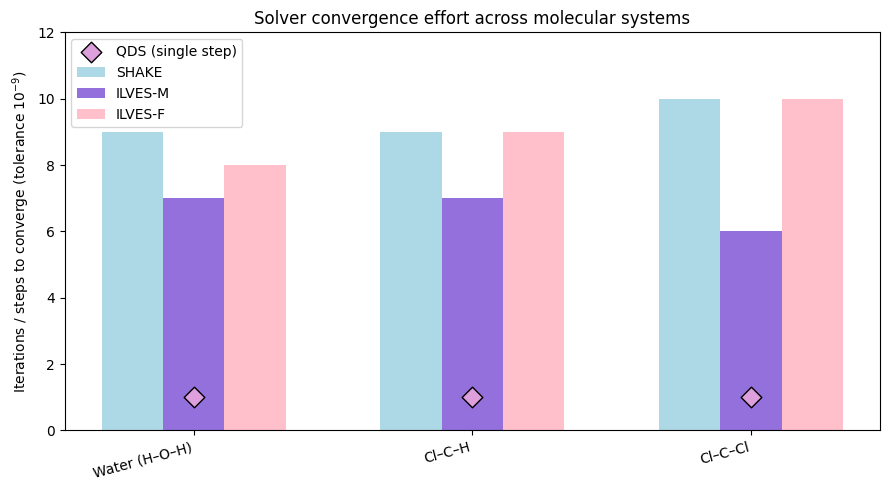

In [ ]:
#Graph

import matplotlib.pyplot as plt
import numpy as np

# Data (tolerance 1e-9)
systems = ["Water (H–O–H)", "Cl–C–H", "Cl–C–Cl"]
shake  = [9, 9, 10]
ilvesm = [7, 7, 6]
ilvesf = [8, 9, 10]
qds_steps = [1, 1, 1]

x = np.arange(len(systems))
w = 0.22

plt.figure(figsize=(9, 5))

# Iterative solvers (bars)
plt.bar(x - w, shake,  width=w, label="SHAKE",   color="lightblue")
plt.bar(x,     ilvesm, width=w, label="ILVES-M", color="mediumpurple")
plt.bar(x + w, ilvesf, width=w, label="ILVES-F", color="pink")

# QDS shown as points (NOT bars)
plt.scatter(
    x,
    qds_steps,
    marker="D",
    s=110,
    color="plum",
    edgecolors="black",
    label="QDS (single step)",
    zorder=5
)

plt.xticks(x, systems, rotation=15, ha="right")
plt.ylabel(r"Iterations / steps to converge (tolerance $10^{-9}$)")
plt.title("Solver convergence effort across molecular systems")
plt.ylim(0, max(shake + ilvesm + ilvesf) + 2)
plt.legend()
plt.tight_layout()
plt.show()

